In [2]:
!pip install vk_api

(-0.004888168473533194, 0.9615031335432375, <module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>)


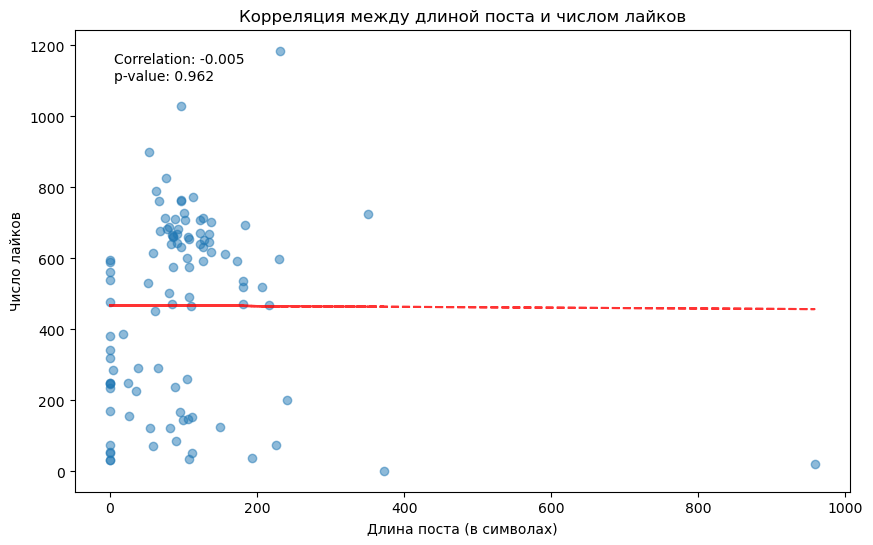

In [143]:
import vk_api
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

def scrape_wall_data(token, owner_id, count=10):
    """
    Парсинг данных с vk.com.
    Параметры: 
    token - access token (https://vkhost.github.io) 
    owner_id - id публичного сообщества 
    count - количество постов 
    ...
    Возвращает список. 
    """
    try:
        # Инициализация VK API
        vk_session = vk_api.VkApi(token=token)
        vk = vk_session.get_api()

        # Метод wall.get
        posts = vk.wall.get(owner_id=owner_id, count=count)['items']

        # Хранилище для данных
        scraped_data = []

        # Парсинг
        for post in posts:
            post_data = {
                'post_id': post['id'],
                'text': post['text'], 
                'views': post['views']['count'],
                'likes': post['likes']['count']
            }
            scraped_data.append(post_data)

        return scraped_data

    except vk_api.exceptions.ApiError as e:
        print(f"Error accessing VK API: {e}")
        return []

# Допишите функцию для сохранения *.csv
def save_to_csv(data, file_name='bitchy_man.csv'):
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['post_id', 'text', 'views', 'likes'])
        writer.writeheader()
        for row in data: 
            writer.writerow({
                'post_id': row.get('post_id'),
                'text': row.get('text'),
                'views': row.get('views'),
                'likes': row.get('likes')
            })

        return data


def stats(file_name):
     """
     # Строит график рассеяния для корреляции между символьной длины поста и числом лайков. 
     Параметры: 
     file_name - имя файла
     ... 
     Возвращает кортеж: коэффициент корреляции Пирсона, p-value, график 
     """

     # Создаем колонку в датафрейме с параметром посимвольной длины поста 
     df['text_length'] = df['text'].fillna('').str.len()
    
     correlation, p_value = pearsonr(df['text_length'], df['likes'])
    
     # Строим график
     plt.figure(figsize=(10, 6))
     plt.scatter(df['text_length'], df['likes'], alpha=0.5)
     plt.xlabel('Длина поста (в символах)')
     plt.ylabel('Число лайков')
     plt.title('Корреляция между длиной поста и числом лайков')
    
     # Добавляем линию тренда на график
     z = np.polyfit(df['text_length'], df['likes'], 1)
     p = np.poly1d(z)
     plt.plot(df['text_length'], p(df['text_length']), "r--", alpha=0.8)
    
     # Добавляем на график корреляцию
     plt.text(0.05, 0.95, 
              f'Correlation: {correlation:.3f}\np-value: {p_value:.3f}',
              transform=plt.gca().transAxes,
              verticalalignment='top')
    
     return correlation, p_value, plt

# Функция для выполнения задачи
def main():
    # Введите ваш токен VK API
    token = 'vk1.a.srsxfNkmpvjfOHQKmWs3ZSbHuSzApANikmFilgYKz_5qEIK8erfzPRX4o4d7xxlNPZKLlqGTO48K3Up9KbSvI9viV5_DQIkJ8zjqQ7KFTctTDcoFcvldYKOUsUsQHCvp2i18ZSbRt2wQO-7mIW1yTVjNIxnrPq0btpZwBhOjniug5Zh489yqsgivs8GZtizuk1uw0XjOYiUpP56WPSjzCA'

    # Введите ID сообщества
    owner_id = -176864224

    # Введите количество публикаций для скрейпинга
    num_posts = 100

    # Запустите функцию для скрейпинга
    scraped_data = scrape_wall_data(token, owner_id, num_posts)

    if scraped_data:
        # Запустите функцию для сохранения *.csv
       save_to_csv(scraped_data, file_name='bitchy_man.csv')
        # Выведите статистику по выгруженной информации
       print(stats('bitchy_man.csv'))
    else:
        print("No data")

if __name__ == "__main__":
    main()